# Graph Visualization

Week 2 Part 1 Assignment *Team 2: Nathan Lim, Joel Park, Christophe Hunt, Ilya Kats, Pavan Akula

# Abstract

The goals of this assignment are

1. Load a graph database of your choosing from a text file or other source.
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
4. Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

# Introduction

As part of the assignment, we be presenting how to load data that has many-to-many relationship. Example: One user can have access to many reports and user can run multiple reports.

# Software

We will be using Ananconda and Spyder Python 2.7 version as a development platform. Jupyter notebook for documentation. Gephi graph database is used to showcase this project.

# Data Source

We will be using large network dataset from https://snap.stanford.edu/data/. Data releted to California roads. Intersections and endpoints are represented by nodes and the roads connecting these intersections or road endpoints are represented by undirected edges. In addition, we will be looking at departmental e-mails and see how each the e-mails link to each other.

Let's take a look at the California Road Dataset first.

In [1]:
# Importing packages
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np

# Importing packages used to display images
import urllib2
from PIL import Image
import requests
from io import BytesIO

In [3]:
# We had uploaded the original .txt file into a github. 
# You may access the raw file at: 
# https://raw.githubusercontent.com/ilyakats/CUNY-DATA620/master/data/roadNet-CA%20Subset.txt
road = pd.read_table("https://raw.githubusercontent.com/ilyakats/CUNY-DATA620/master/data/roadNet-CA%20Subset.txt", 
                     sep='\t',skiprows=4)
road.columns = ['FromNodeId','ToNodeId']

In [4]:
# Let's take a look at the first five rows
road.head(5)

,FromNodeId,ToNodeId
0,0,2
1,0,469
2,1,0
3,1,6
4,1,385


In [5]:
# Let's convert the dataframe into a graph format compatible with networkx
G = nx.from_pandas_dataframe(road, 'FromNodeId', 'ToNodeId')

In [6]:
# How many nodes are in this data set?
nx.number_of_nodes(G)

744

In [7]:
# How many edges are in this data set?
nx.number_of_edges(G)

953

In [10]:
# Let's obtain the node degrees for each node 

num_neighbors = nx.degree(G)

# Node degree: For each individual node (Ni), it is the number of nodes that Ni is connected to. 
# It could potentially represent a proxy where the more nodes Ni is connected to, the more potential that Ni may have
# influence on its neighbors. It's not perfect, but it's an easy place to start.

# And let's calculate the average length between each node
avg = 0
for key in num_neighbors:
    avg = avg + num_neighbors[key]
print(avg/float(len(num_neighbors)))

2.56182795699


In [11]:
# To visualize the graph, we will use Gephi
nx.write_gexf(G, 'roadNetCA.gexf')

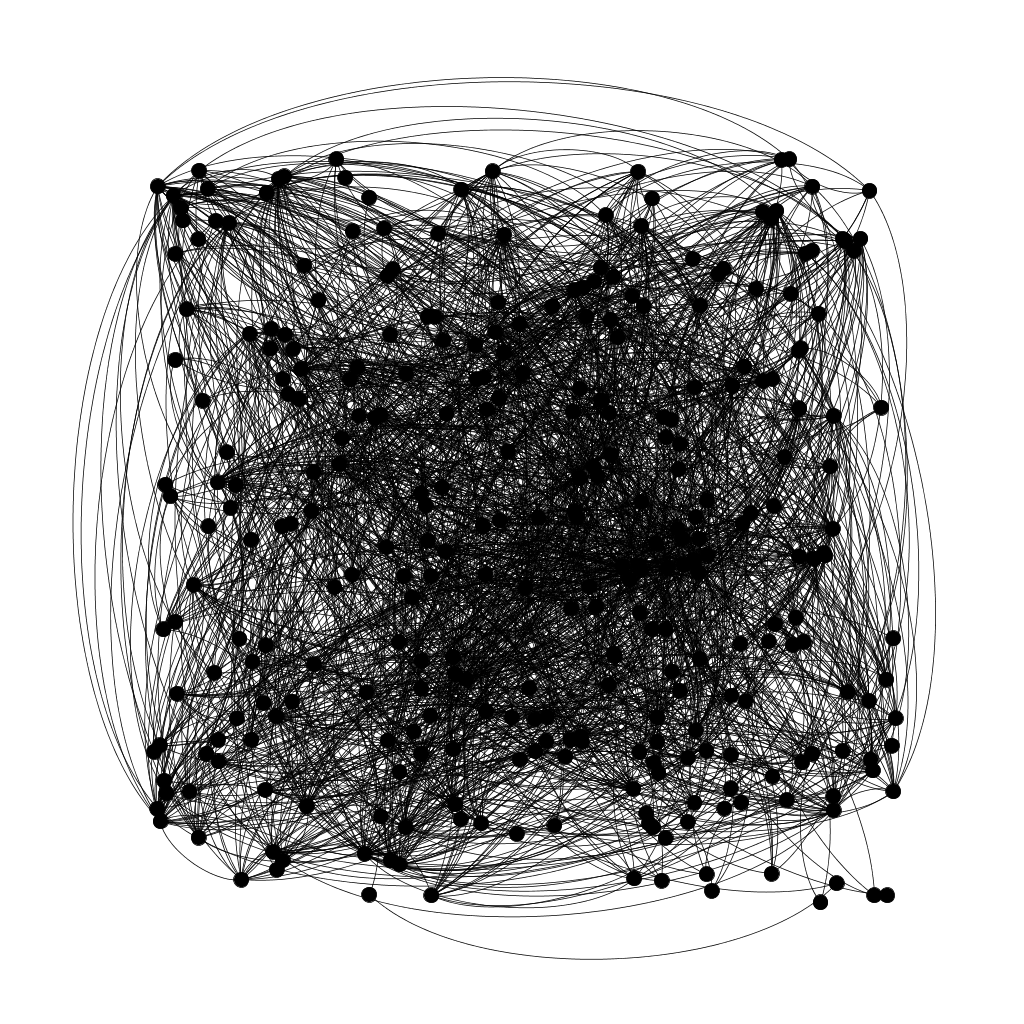

In [13]:
# After loading the file in Gephi, the image was saved into Github
# The image below demonstrates the nodes and its edges.
response = requests.get("https://raw.githubusercontent.com/ilyakats/CUNY-DATA620/master/data/email-Eu-core-temporal-Dept1.png")
img = Image.open(BytesIO(response.content))
img

# Analysis

In part two of the assignment, we are asked to perform some basic analysis on this data set. Some of the metrics that we will be looking at will be:

1. Diameter
According to Wikipedia, "it is the shortest distance between the two most distant nodes in the network. In other words, once the shortest path length from every node to all other nodes is calculated, the diameter is the longest of all the calculated path lengths. The diameter is representative of the linear size of a network." The eccentricity of the graph vertex "in a connected graph is the maximum graph distance between and any other vertex of. For a disconnected graph, all vertices are defined to have infinite eccentricity. The maximum eccentricity is the graph diameter."

2. Betweenness Centrality
According to "https://www.sci.unich.it/~francesc/teaching/network/betweeness.html", "Betweenness centrality measures the extent to which a vertex lies on paths between other vertices. Vertices with high betweenness may have considerable influence within a network by virtue of their control over information passing between others. They are also the ones whose removal from the network will most disrupt communications between other vertices because they lie on the largest number of paths taken by messages."

3. Closeness Centrality
According to "www.lsu.edu/faculty/bratton/networks/closeness.ppt", "Closeness is a measure of the degree to which an individual is near all other individuals in a network. It is the inverse of the sum of the shortest distances between each node and every other node in the network."

In [16]:
# Load algorithms from networkx
from networkx.algorithms import *

# Define function that would create a sorted list, from highest to lowest.
# This function was taken from page 47 from "Social Network Analysis for Startups".

def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k)) 
    return ms

In [27]:
# Print out the degrees in a sorted order 
# Top 10
num_neighbors # Degrees
sorted_degree = sorted_map(num_neighbors)
sorted_degree[0:10]

[(6738, 6),
 (125, 5),
 (136, 5),
 (222, 5),
 (239, 5),
 (325, 5),
 (1068, 5),
 (6713, 5),
 (6790, 5),
 (3, 4)]

In [21]:
d = nx.diameter(G, e = None) # Diameter of the graph
d

NetworkXError: Graph not connected: infinite path length

As you can see, not all nodes are connected. Therefore, a diameter cannot be defined for this particular graph.

In [28]:
# Top 10
b = nx.betweenness_centrality(G) # Betweenness Centrality
bb = sorted_map(b)
bb[0:10]

[(212, 0.10112787004968471),
 (303, 0.09899641663325337),
 (190, 0.09892635594225341),
 (308, 0.09545694844831575),
 (260, 0.09538696742863069),
 (36178, 0.09213538333406818),
 (242, 0.09146529289909215),
 (305, 0.09031176162507955),
 (154, 0.09027104774177905),
 (210, 0.08837019228843614)]

In [29]:
# Top ten
c = nx.closeness_centrality(G) # Closeness Centrality
cc = sorted_map(c)
cc[0:10]

[(154, 0.05475145597759661),
 (129, 0.05438708247877565),
 (356, 0.054198148985244464),
 (128, 0.053655913322425065),
 (130, 0.05362238361561524),
 (357, 0.053372240323985874),
 (189, 0.0529850073361459),
 (86, 0.05292781457572138),
 (353, 0.052538937321835774),
 (191, 0.052482702985252774)]

In [26]:
cc[0:10]

[(154, 0.05475145597759661),
 (129, 0.05438708247877565),
 (356, 0.054198148985244464),
 (128, 0.053655913322425065),
 (130, 0.05362238361561524),
 (357, 0.053372240323985874),
 (189, 0.0529850073361459),
 (86, 0.05292781457572138),
 (353, 0.052538937321835774),
 (191, 0.052482702985252774)]

If you take a look closely at the sorted list, it appears that some roads are more connected and more central that other roads. In this particular example, roadNodeID 154, 129, and 356 appear to be highly connected. The highest node degree here however is: 6738.

Interestingly, a diameter measure cannot be taken here because this subset contains roads that are not all connected to each other, thus creating an infinite path, which is a meaningless value.